In [14]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#from sklearn.externals import joblib #存取model
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [8]:
file_path='G:/我的雲端硬碟/轉譯醫學/Data/MJ/Model_data.csv'
data=pd.read_csv(file_path)
data.head

<bound method NDFrame.head of         yr         pid  psick11  gender   age  g_ssr      g_bmi  mdrug07  \
0     1999  a19k095609        0       2  63.0  148.0  22.863438      0.0   
1     2012  a19k530206        0       2  56.0  137.0  23.126909      0.0   
2     2008  a19k314940        0       1  38.0  140.0  33.499607      0.0   
3     2005  a19k451013        0       1  27.0  108.0  21.290539      0.0   
4     2008  a19k048394        0       1  51.0  138.0  26.257479      0.0   
...    ...         ...      ...     ...   ...    ...        ...      ...   
5715  2016  a19k426143        1       2  73.0  162.0  21.993221      1.0   
5716  2016  a19k165002        1       1  62.0  138.0  33.275032      0.0   
5717  2016  a19k229242        1       2  33.0  107.0  20.361435      0.0   
5718  2016  a19k287542        1       1  78.0  155.0  24.375000      1.0   
5719  2016  a19k217578        1       2  26.0  135.0  30.323666      0.0   

      drinkornot_98  psick10  drinkornot_group  
0       

In [9]:
##測試資料 (隨機抽樣200個sample)
test_health=data[(data.psick11==0)].sample(n=100, axis=0, random_state=5)

test_stroke=data[(data.psick11==1)].sample(n=100,axis=0, random_state=6)

test_sample=pd.concat([test_health,test_stroke], axis=0)
#'drinkornot_98' Drop因為已經合成新的欄位
test=np.array(test_sample.drop(['yr','pid','psick11','drinkornot_98'],axis=1))
test

array([[  1.       ,  24.       , 117.       , ...,   0.       ,
          0.       ,   0.       ],
       [  2.       ,  52.       , 118.       , ...,   0.       ,
          0.       ,   1.       ],
       [  2.       ,  66.       , 140.       , ...,   0.       ,
          0.       ,   0.       ],
       ...,
       [  1.       ,  70.       , 149.       , ...,   0.       ,
          0.       ,   0.       ],
       [  1.       ,  68.       , 118.7313739, ...,   0.       ,
          0.       ,   1.       ],
       [  1.       ,  61.       , 124.       , ...,   1.       ,
          0.       ,   0.       ]])

In [39]:
#呼叫model
logistic_r = joblib.load('logistic_F2.pkl')
#預測資料
#model_pred= logistic_r.predict(test).predict_proba

#產生一個機率分布(在每個點可能是0或是1的機率)--->predict_proba()
model_pred_p=logistic_r.predict_proba(test) 
label_test=np.array(test_sample.psick11)
# 測試資料,產生confusion_matrix
print(logistic_r)
print(model_pred_p)
print(pd.crosstab(label_test, model_pred, rownames=['label'], colnames=['predict']))
print(f'Accuracy: {accuracy_score(label_test, model_pred)}')

Pipeline(memory=None,
         steps=[('Scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('LogReg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=5,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)
[[0.93155811 0.06844189]
 [0.67580238 0.32419762]
 [0.30397202 0.69602798]
 [0.67791398 0.32208602]
 [0.60309917 0.39690083]
 [0.55782129 0.44217871]
 [0.77644586 0.22355414]
 [0.66221067 0.33778933]
 [0.98914367 0.01085633]
 [0.8550848  0.1449152 ]
 [0.76526818 0.23473182]
 [0.55058925 0.44941075]
 [0.96717209 0.03282791]
 [0.66770748 0.3

In [45]:

model_pred_p[:,0]
label_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [46]:
#pd.crosstab(label_test, model_pred_p[1,:], rownames=['label'], colnames=['predict'])

In [54]:
#######$500 * FN(C) + $0 * TN(C) + $100 * FP(C) + $100 * TP(C)
COST_OF_ERRORS = np.array([[0, 5], [20, 5]])
    
cutoffs = np.arange(0.1, 1, 0.1)
   
print(COST_OF_ERRORS)

cutoffs

[[ 0  5]
 [20  5]]


array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [55]:
costs = []

for c in cutoffs:
    #np.where 篩選機率大於c的就歸為1,小於c就歸為0
    conf_matrix = pd.crosstab(label_test, 
                                  np.where(model_pred_p[:,1] > c, 1, 0), rownames=['actual'], colnames=['predictions'])
    print(conf_matrix) #印出10個crosstable (根據不同的cutoffs)
    #conf_matrix.iat[0,0]-=1
    #conf_matrix.iat[1,1]-=1
    conf_matrix_normalized = conf_matrix/np.sum(np.sum(conf_matrix))
    cost = (COST_OF_ERRORS * conf_matrix_normalized).values.sum()
    costs.append(cost)
    

predictions   0   1
actual             
0            35  65
1             1  99
predictions   0   1
actual             
0            57  43
1             8  92
predictions   0   1
actual             
0            63  37
1            13  87
predictions   0   1
actual             
0            76  24
1            19  81
predictions   0   1
actual             
0            84  16
1            22  78
predictions   0   1
actual             
0            86  14
1            30  70
predictions   0   1
actual             
0            94   6
1            39  61
predictions   0   1
actual             
0            97   3
1            52  48
predictions    0   1
actual              
0            100   0
1             73  27


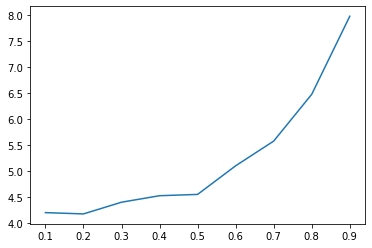

In [56]:
costs = np.array(costs)
plt.plot(cutoffs, costs)
plt.show()

In [57]:

conf_matrix/np.sum(np.sum(conf_matrix))

predictions,0,1
actual,,
0,0.500,0.000
1,0.365,0.135
